<a href="https://colab.research.google.com/github/MilindiSenevirathne/COVID-19_Test/blob/main/Feature_Extraction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/sample_data/country_wise_latest.csv', sep = r'\s*,\s*', engine = 'python')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Latitude,Longitude
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,33.939110,67.709953
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,41.153332,20.168331
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,28.033886,1.659626
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,42.506285,1.521801
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,-11.202692,17.873887


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Latitude                  1
Longitude                 1
dtype: int64

In [5]:
# Drop rows where either 'Latitude' or 'Longitude' is null
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Latitude                  0
Longitude                 0
dtype: int64

In [6]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df.Longitude, df.Latitude
))

df_geo.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Latitude,Longitude,geometry
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,33.939110,67.709953,POINT (67.70995 33.93911)
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,41.153332,20.168331,POINT (20.16833 41.15333)
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,28.033886,1.659626,POINT (1.65963 28.03389)
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,42.506285,1.521801,POINT (1.52180 42.50628)
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,-11.202692,17.873887,POINT (17.87389 -11.20269)


In [7]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-7-c734f8c498f7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-8-51f24de5d1df>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


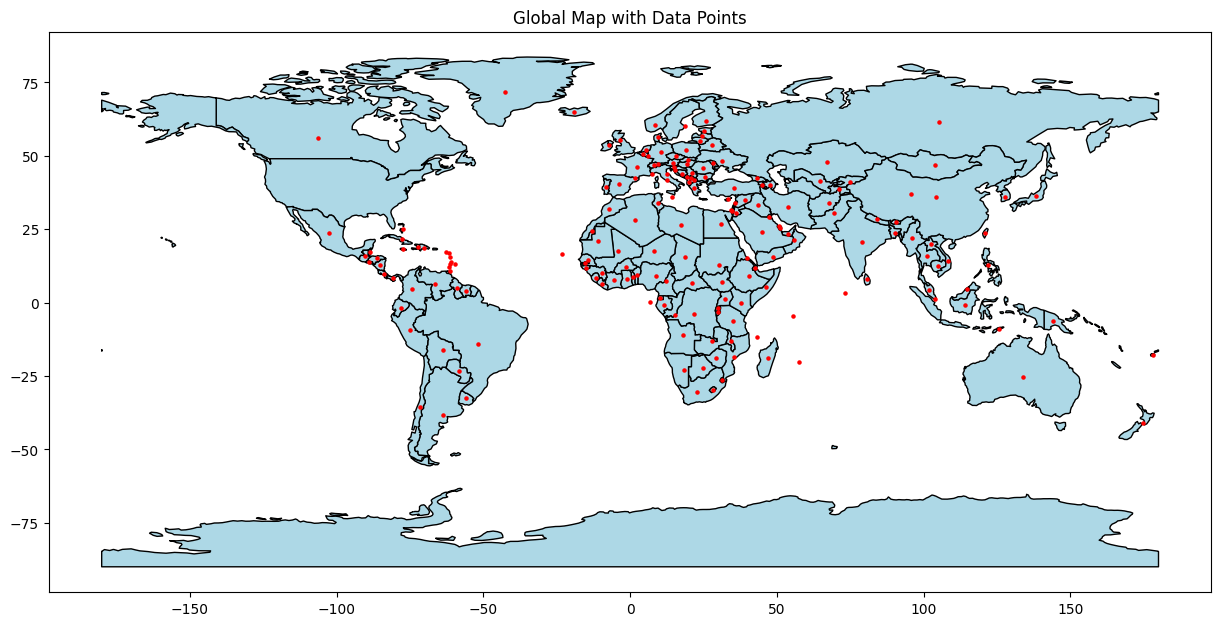

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='black')
df_geo.plot(ax=ax, color='red', markersize=5)
plt.title('Global Map with Data Points')
plt.show()

In [9]:
f = px.choropleth(df, locationmode = 'country names', locations = df['Country/Region'], color = df['Country/Region'])
f.show()

In [10]:
encoder = OneHotEncoder()
encoded_regions = encoder.fit_transform(df[['WHO Region']]).toarray()

if hasattr(encoder, 'get_feature_names_out'):
    encoded_region_columns = encoder.get_feature_names_out(['WHO Region'])
else:
    # Manually create feature names
    encoded_region_columns = ['WHO Region_' + str(category) for category in encoder.categories_[0]]

df[encoded_region_columns] = encoded_regions

# Drop the original categorical column
df.drop('WHO Region', axis=1, inplace=True)

# Standardizing numerical data
scaler = StandardScaler()
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = scaler.fit_transform(df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

In [11]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,1 week change,1 week % increase,Latitude,Longitude,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,-0.136568,-0.159411,-0.135185,-0.114334,106,10,18,3.50,69.49,...,737,2.07,33.939110,67.709953,0.0,0.0,1.0,0.0,0.0,0.0
1,Albania,-0.218452,-0.239212,-0.253264,-0.150924,117,6,63,2.95,56.25,...,709,17.00,41.153332,20.168331,0.0,0.0,0.0,1.0,0.0,0.0
2,Algeria,-0.158198,-0.166930,-0.168637,-0.122880,616,8,749,4.16,67.34,...,4282,18.07,28.033886,1.659626,1.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,-0.228818,-0.245737,-0.263477,-0.160014,10,0,0,5.73,88.53,...,23,2.60,42.506285,1.521801,0.0,0.0,0.0,1.0,0.0,0.0
4,Angola,-0.228706,-0.246518,-0.266427,-0.157130,18,1,0,4.32,25.47,...,201,26.84,-11.202692,17.873887,1.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-12-0849480c562b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



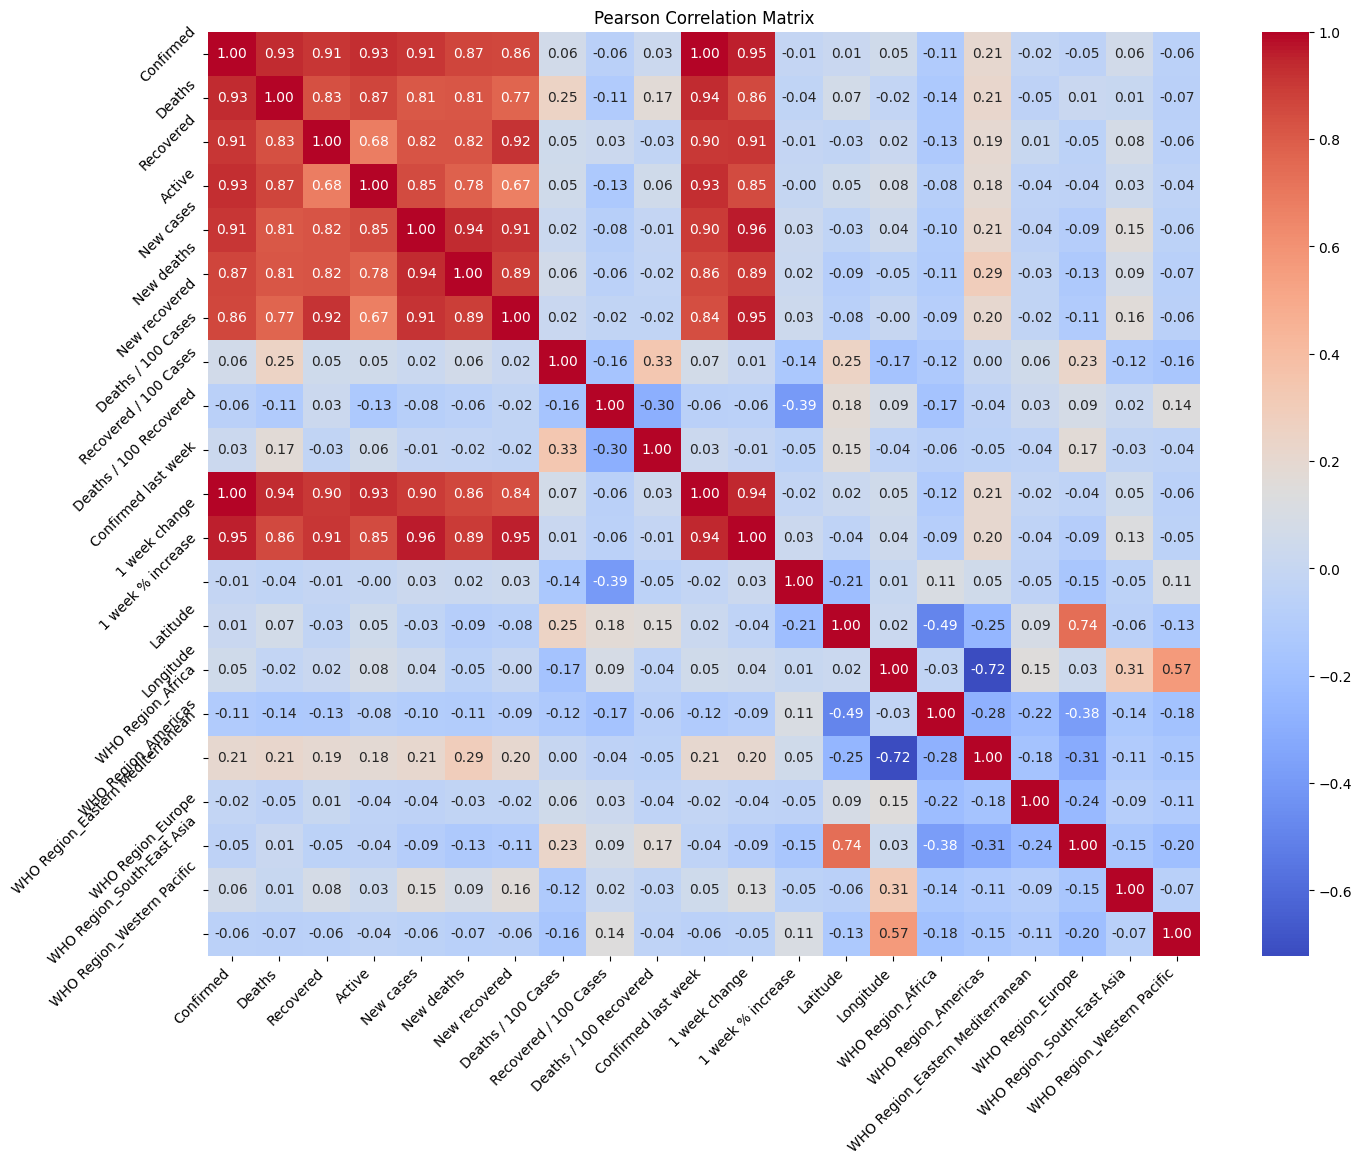

In [12]:
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.title('Pearson Correlation Matrix')
plt.show()

In [13]:
df_dropped = df.drop(['Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', '1 week change', '1 week % increase'], axis=1)
df_dropped.head()

,Country/Region,Confirmed,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,Latitude,Longitude,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,-0.136568,69.49,5.04,35526,33.939110,67.709953,0.0,0.0,1.0,0.0,0.0,0.0
1,Albania,-0.218452,56.25,5.25,4171,41.153332,20.168331,0.0,0.0,0.0,1.0,0.0,0.0
2,Algeria,-0.158198,67.34,6.17,23691,28.033886,1.659626,1.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,-0.228818,88.53,6.48,884,42.506285,1.521801,0.0,0.0,0.0,1.0,0.0,0.0
4,Angola,-0.228706,25.47,16.94,749,-11.202692,17.873887,1.0,0.0,0.0,0.0,0.0,0.0


#Dimensions Reduction using PCA

<ipython-input-14-c81b15a64868>:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



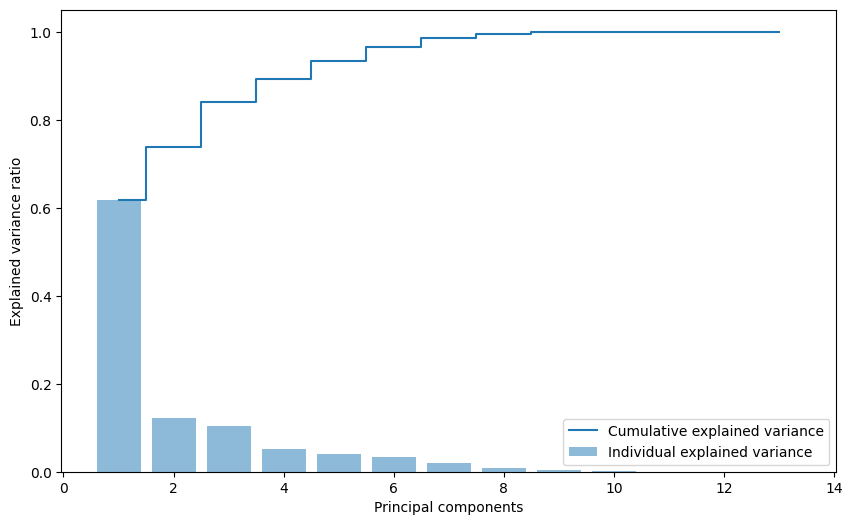

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Country/Region', 'Latitude', 'Longitude', 'WHO Region_Africa',
                                          'WHO Region_Americas', 'WHO Region_Western Pacific','WHO Region_South-East Asia',
                                          'WHO Region_Europe','WHO Region_Eastern Mediterranean'], axis=1))

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [15]:
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
#df['PCA3'] = pca_result[:, 2]
#df['PCA4'] = pca_result[:, 3]
#df['PCA5'] = pca_result[:, 4]

In [16]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,Latitude,Longitude,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,PCA1,PCA2
0,Afghanistan,-0.136568,-0.159411,-0.135185,-0.114334,106,10,18,3.50,69.49,...,33.939110,67.709953,0.0,0.0,1.0,0.0,0.0,0.0,-0.481343,-0.174032
1,Albania,-0.218452,-0.239212,-0.253264,-0.150924,117,6,63,2.95,56.25,...,41.153332,20.168331,0.0,0.0,0.0,1.0,0.0,0.0,-0.613672,0.159294
2,Algeria,-0.158198,-0.166930,-0.168637,-0.122880,616,8,749,4.16,67.34,...,28.033886,1.659626,1.0,0.0,0.0,0.0,0.0,0.0,-0.400352,0.083293
3,Andorra,-0.228818,-0.245737,-0.263477,-0.160014,10,0,0,5.73,88.53,...,42.506285,1.521801,0.0,0.0,0.0,1.0,0.0,0.0,-0.674156,-0.261818
4,Angola,-0.228706,-0.246518,-0.266427,-0.157130,18,1,0,4.32,25.47,...,-11.202692,17.873887,1.0,0.0,0.0,0.0,0.0,0.0,-0.611435,1.136429


In [17]:
df2 = df.drop(['Confirmed','Deaths','Recovered','Active','New cases','New deaths',
               'New recovered','Deaths / 100 Cases','Recovered / 100 Cases', 'WHO Region_Africa',
                                          'WHO Region_Americas', 'WHO Region_Western Pacific','WHO Region_South-East Asia',
                                          'WHO Region_Europe','WHO Region_Eastern Mediterranean','Deaths / 100 Recovered',	'Confirmed last week',	'1 week change',	'1 week % increase'], axis=1)
df2.head()

,Country/Region,Latitude,Longitude,PCA1,PCA2
0,Afghanistan,33.939110,67.709953,-0.481343,-0.174032
1,Albania,41.153332,20.168331,-0.613672,0.159294
2,Algeria,28.033886,1.659626,-0.400352,0.083293
3,Andorra,42.506285,1.521801,-0.674156,-0.261818
4,Angola,-11.202692,17.873887,-0.611435,1.136429


#K-Mean Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

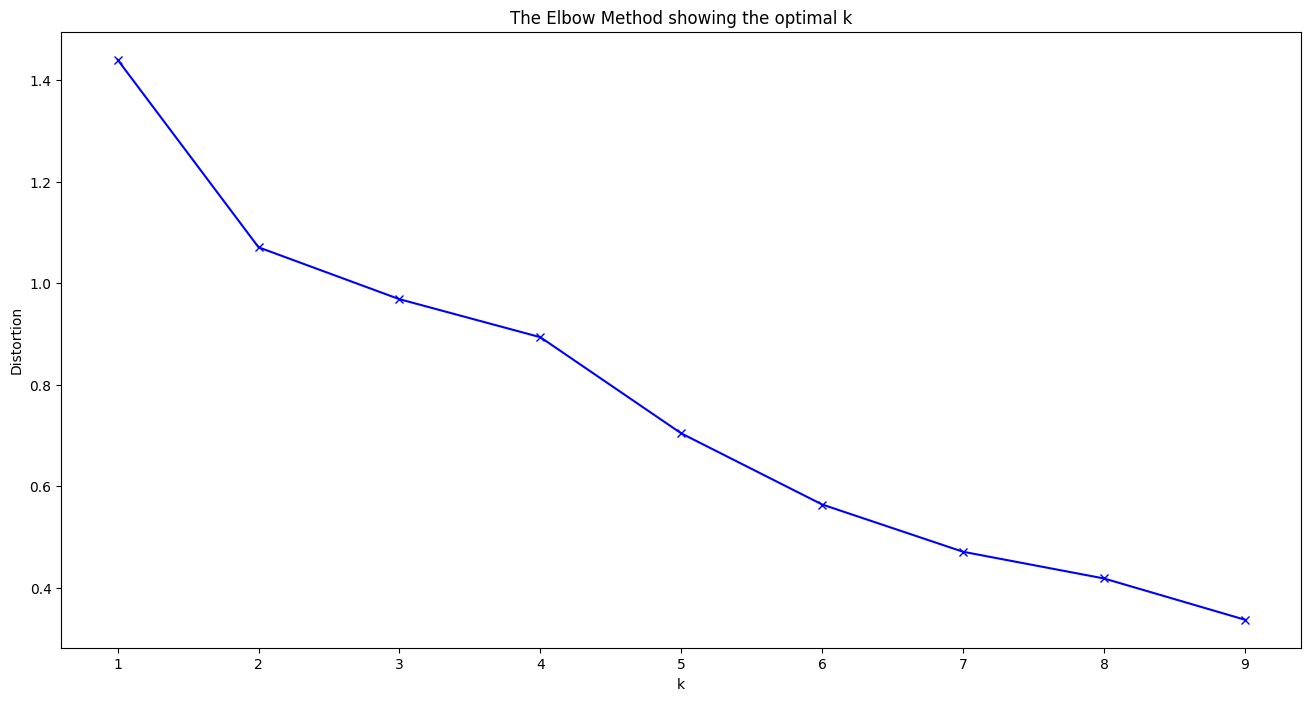

In [18]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2[['PCA1', 'PCA2']])
    distortions.append(sum(np.min(cdist(df2[['PCA1', 'PCA2']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df2[['PCA1', 'PCA2']].shape[0])

# Plot the elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



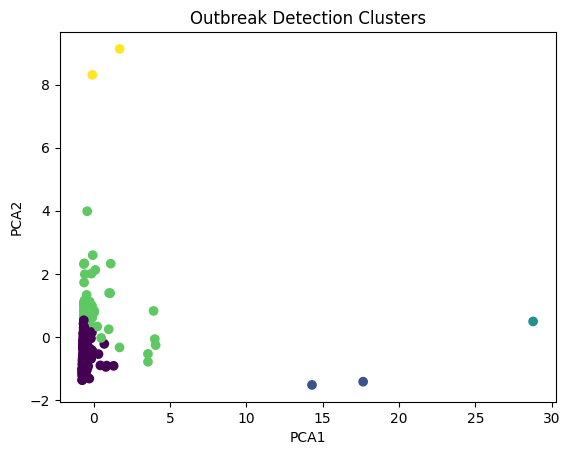

For K-Means, the average silhouette_score is : 0.5287701257021931


In [26]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df2[['PCA1', 'PCA2']])

df2['Cluster'] = clusters

# Plot the clusters
plt.scatter(df2['PCA1'], df2['PCA2'], c=df2['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Outbreak Detection Clusters')
plt.show()

silhouette_avg_kmeans = silhouette_score(df2[['PCA1', 'PCA2']], kmeans.labels_)
print("For K-Means, the average silhouette_score is :", silhouette_avg_kmeans)

In [27]:
df2.head()

,Country/Region,Latitude,Longitude,PCA1,PCA2,Cluster
0,Afghanistan,33.939110,67.709953,-0.481343,-0.174032,0
1,Albania,41.153332,20.168331,-0.613672,0.159294,0
2,Algeria,28.033886,1.659626,-0.400352,0.083293,0
3,Andorra,42.506285,1.521801,-0.674156,-0.261818,0
4,Angola,-11.202692,17.873887,-0.611435,1.136429,3


In [28]:
# Assume df2 is your dataframe after clustering
outlier_cluster = df2['Cluster'].value_counts().idxmin()  # This gives the least frequent cluster

# Filter the dataframe for outlier cluster
outlier_countries = df2[df2['Cluster'] == outlier_cluster]['Country/Region'].tolist()

# Print the countries in the outlier cluster
print("Outlier Countries:", outlier_countries)

Outlier Countries: ['US']


#Isolation Forest model

In [29]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(df2[['PCA1', 'PCA2']])

# Predict anomalies (outliers are labeled as -1)
anomalies = iso_forest.predict(df2[['PCA1', 'PCA2']])
df2['Anomaly'] = anomalies

# Filter out the outlier countries
outlier_countries = df2[df2['Anomaly'] == -1]['Country/Region'].tolist()

# Display the outlier countries
print(outlier_countries)

# Print the length of the outlier list
print("Number of Outlier Countries:", len(outlier_countries))

['Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'France', 'Gambia', 'India', 'Iran', 'Italy', 'Mexico', 'Netherlands', 'Papua New Guinea', 'Peru', 'Qatar', 'Russia', 'South Africa', 'Spain', 'Sweden', 'US', 'United Kingdom', 'Yemen']
Number of Outlier Countries: 22


#One-Class SVM model

In [30]:
# Fit the One-Class SVM model
one_class_svm = OneClassSVM(kernel='rbf', gamma='auto').fit(df2[['PCA1', 'PCA2']])

# Predict anomalies (outliers are labeled as -1)
anomalies = one_class_svm.predict(df2[['PCA1', 'PCA2']])
df2['Anomaly2'] = anomalies

# Display the outlier countries
print(outlier_countries)

# Print the length of the outlier list
print("Number of Outlier Countries:", len(outlier_countries))

ocsvm_labels = one_class_svm.fit_predict(df2[['PCA1', 'PCA2']])
ocsvm_labels[ocsvm_labels == 1] = 0  # normal
ocsvm_labels[ocsvm_labels == -1] = 1 # anomaly

silhouette_avg_ocsvm = silhouette_score(df2[['PCA1', 'PCA2']], ocsvm_labels)
print("For One-Class SVM, the average silhouette_score is :", silhouette_avg_ocsvm)

['Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'France', 'Gambia', 'India', 'Iran', 'Italy', 'Mexico', 'Netherlands', 'Papua New Guinea', 'Peru', 'Qatar', 'Russia', 'South Africa', 'Spain', 'Sweden', 'US', 'United Kingdom', 'Yemen']
Number of Outlier Countries: 22
For One-Class SVM, the average silhouette_score is : 0.16561981178479832
